# Artificial Intelligence and Neural Networks class project
## Introduction
This project consists in the training of a Convolutional Neural Network capable of classify diferent types of brain tumors. The data used to accomplish the project is collected from the following dataset:

https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset?select=Training


## Libraries
First step is to include all the necessary libraries.

In [1]:
# import libreries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
import zipfile
from google.colab import files

In [2]:
# Upload zip with the dataset
files.upload()

{}

In [3]:
# Path to the zip archive
zip_file_path = '/content/archive.zip'

# Path where the folder will be saved
extracted_folder_path = '/content/Dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

In [4]:
# Paths to the training and testing folders
train_data_dir = '/content/Dataset/Training'
test_data_dir = '/content/Dataset/Testing'

In [5]:
# Create lists to save the images and the labels
train_images = []
train_labels = []
test_images = []
test_labels = []

## Preprocessing
Te images in this dataset are given in diferent sizes so here, we import our images and resize them to one same size for all of them. The dataset gives us the images already divided into testing and trainin images in a aproximately proportion of 80% for the training part (81.3%) and 20% for the testing part (18.7%).

The 80% is used to train the model. During training, the model learns to recognize patterns and features within the images. It adjusts its parameters to make predictions based on the input data.

After training, you need to assess how well the model performs on new, unseen data. The remaining 20% of the images are used as a separate dataset (testing set) to evaluate the model's performance. This set acts as a simulation of real-world scenarios where the model encounters new images it hasn't seen before.

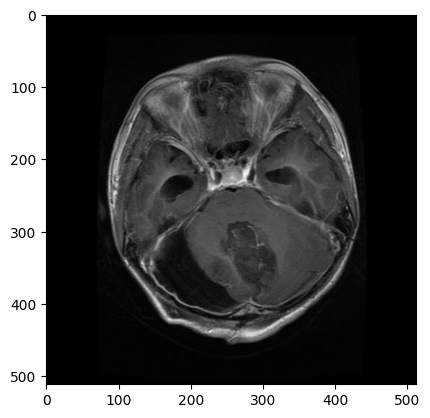

In [6]:
# Preview of an image
test_image = cv2.imread('/content/Dataset/Testing/glioma/Te-glTr_0000.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(test_image, cmap='gray')
plt.show()

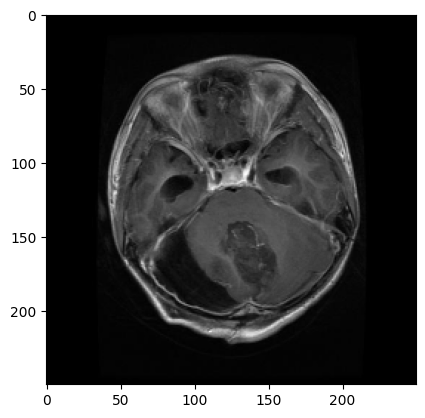

In [7]:
# Preview of the same image but resized
test_image = cv2.imread('/content/Dataset/Testing/glioma/Te-glTr_0000.jpg', cv2.IMREAD_GRAYSCALE)

# Resize
new_width = 250
new_height = 250
resized_image = cv2.resize(test_image, (new_width, new_height))

plt.imshow(resized_image, cmap='gray')
plt.show()

In [8]:
# Funtion to load and resize an image
def load_and_preprocess_image(image_path, target_size=(250, 250)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, target_size)
    img = img_to_array(img)
    return img

In [9]:
# Path to the training images
train_folder_paths = [
    '/content/Dataset/Training/glioma',
    '/content/Dataset/Training/meningioma',
    '/content/Dataset/Training/notumor',
    '/content/Dataset/Training/pituitary'
]

# Path to the testing images
test_folder_paths = [
    '/content/Dataset/Testing/glioma',
    '/content/Dataset/Testing/meningioma',
    '/content/Dataset/Testing/notumor',
    '/content/Dataset/Testing/pituitary'
]

def load_images_from_folder(folder_paths):
    images = []
    labels = []
    for folder_idx, folder_path in enumerate(folder_paths):
        for image_name in os.listdir(folder_path):
            if image_name.endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(folder_path, image_name)
                image = load_and_preprocess_image(image_path)
                images.append(image)
                labels.append(folder_idx)
    return images, labels

# Loading of the training and testing images and labels
train_images, train_labels = load_images_from_folder(train_folder_paths)
test_images, test_labels = load_images_from_folder(test_folder_paths)

# Convertion to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

Confirmation that images and labels were loaded correctly

In [10]:
print(len(train_labels))

5712


In [11]:
print(len(train_images))

5712


In [12]:
print(len(test_labels))

1311


In [13]:
print(len(test_images))

1311


In [14]:
print(test_labels[5])

0


For the final visualization of the results, here we reorganized our images along with their labels

In [15]:
random_indices = np.random.permutation(len(test_labels))

# Reorganization
test_images = test_images[random_indices]
test_labels = test_labels[random_indices]

In [16]:
print(test_labels[5])

2


In [17]:
for i in range(5):
  print(test_labels[i])

0
3
1
1
2


In [18]:
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

Visualization of the images

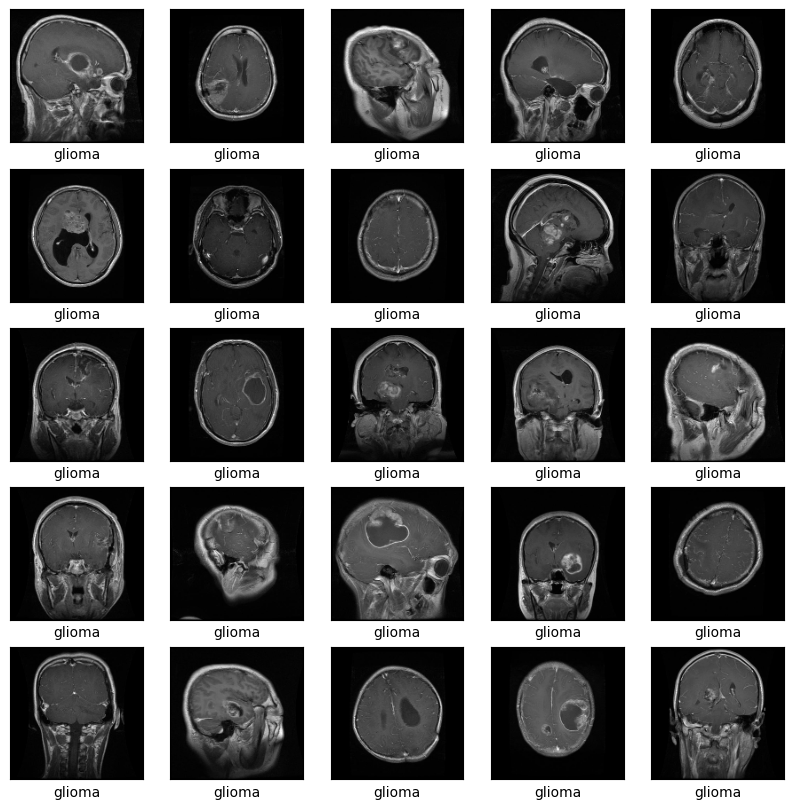

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')

    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [20]:
# Normalize pixel values to be between 0 and 1
train_images = np.array(train_images) / 255.0
test_images = np.array(test_images) / 255.0


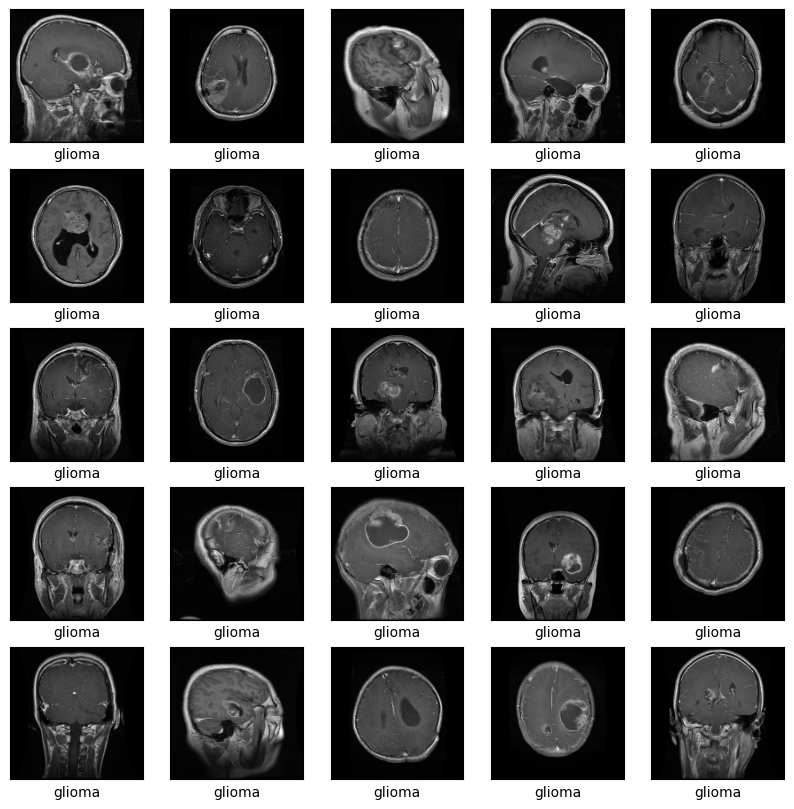

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')

    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [22]:
train_images.shape

(5712, 150, 150, 1)

## Structure and training of Convolutional Artificial Neural Network (CNN)
This section establishes the number of convolution layers and learning layers for our convolutional artificial neural network. For the final layer, a softmax function is stablished to show results as a percentage of each of the 4 different clases we stablished before.

In [47]:
# Convolutional part
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 248, 248, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 124, 124, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 5574

In [49]:
# Learning part
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 248, 248, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 124, 124, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 222784)           

In [27]:
# Model Compliation: Features
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
# CNN training
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


179/179 [==============================] - 258s 1s/step - loss: 0.6296 - accuracy: 0.7447 - val_loss: 0.4384 - val_accuracy: 0.8169
Epoch 2/10
179/179 [==============================] - 256s 1s/step - loss: 0.3296 - accuracy: 0.8773 - val_loss: 0.2617 - val_accuracy: 0.8986
Epoch 3/10
179/179 [==============================] - 253s 1s/step - loss: 0.2057 - accuracy: 0.9273 - val_loss: 0.2255 - val_accuracy: 0.9130
Epoch 4/10
179/179 [==============================] - 244s 1s/step - loss: 0.1081 - accuracy: 0.9641 - val_loss: 0.1478 - val_accuracy: 0.9519
Epoch 5/10
179/179 [==============================] - 256s 1s/step - loss: 0.0607 - accuracy: 0.9797 - val_loss: 0.1282 - val_accuracy: 0.9588
Epoch 6/10
179/179 [==============================] - 251s 1s/step - loss: 0.0289 - accuracy: 0.9904 - val_loss: 0.1589 - val_accuracy: 0.9565
Epoch 7/10
179/179 [==============================] - 258s 1s/step - loss: 0.0190 - accuracy: 0.9946 - val_loss: 0.1464 - val_accuracy: 0.9565
Epoch 8/10

## CNN Results
After training our CNN we get a final accuracy, loss and a validation for both of them. The validation is made with the 20% images left at the beginning. We get a graphic representing the accuracy and the validated accuracy to see if our model really works

41/41 - 14s - loss: 0.2768 - accuracy: 0.9207 - 14s/epoch - 352ms/step


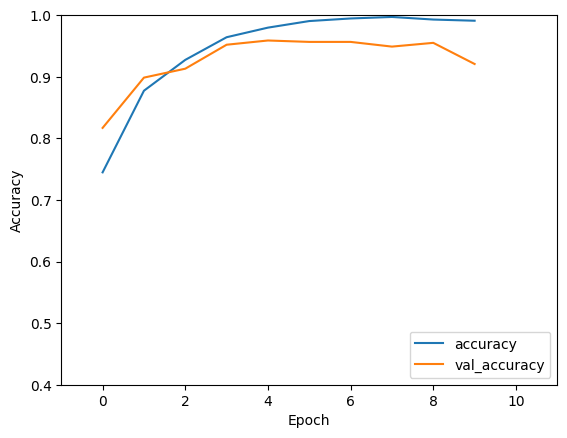

In [29]:
# Plot with the difference in accuracy values from training and validation.
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.xlim([-1, 11])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [30]:
print(test_acc)

0.9206712245941162


## Predictions with the trained CNN
With our model trained, the only thing left to do is find out if the model can correctly classify the images

In [31]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [32]:
results = probability_model.predict(test_images)

41/41 [==============================] - 15s 346ms/step


In [55]:
results[1000]


array([0.17487775, 0.47536653, 0.17487791, 0.17487775], dtype=float32)

In [56]:
print( test_labels[1000] )

1


In [43]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(4))
  plt.yticks([])
  thisplot = plt.bar(range(4), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

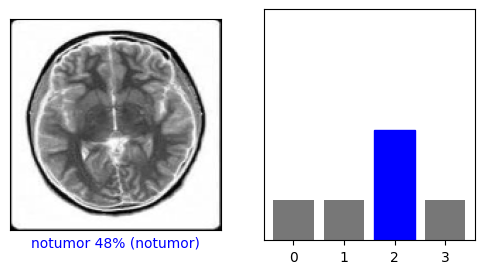

In [54]:
i = 109


plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, results[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, results[i],  test_labels)
plt.show()

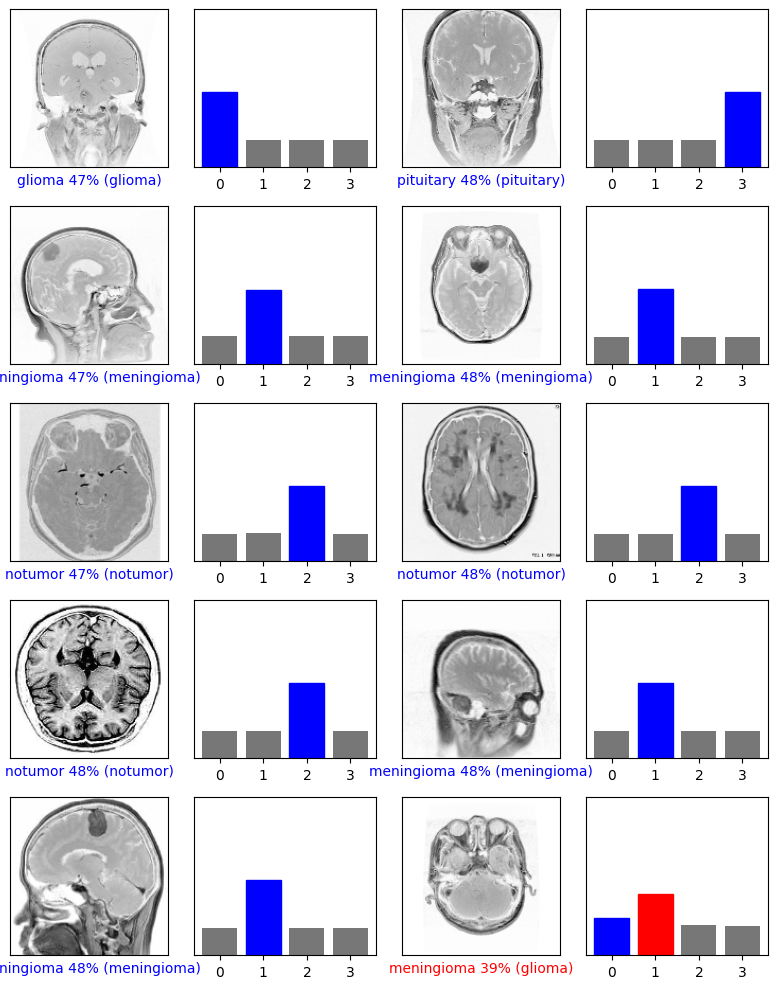

In [52]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, results[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, results[i], test_labels)
plt.tight_layout()
plt.show()

## References
https://www.tensorflow.org/tutorials/keras/classification?hl=es-419

https://www.tensorflow.org/tutorials/images/cnn?hl=es-419

https://www.kaggle.com/datasets